4.10 The final presentation part 1b

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\harip\Instacart Basket Analysis"

In [3]:
# Import Customers_orders_merged
df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data','customers_orders_Updated.pkl'))

# Step 4 Excluding the low revenue

In [4]:
#Creating an 'Exclusion Flag' for customers with low revenue
df.loc[df['max_order'] < 5, 'order_activity_flag'] = 'Customers with low orders'
df.loc[df['max_order'] >= 5, 'order_activity_flag'] = 'Customers with high orders'

In [5]:
df['order_activity_flag'].value_counts(dropna = False)

Customers with high orders    30964564
Customers with low orders      1440295
Name: order_activity_flag, dtype: int64

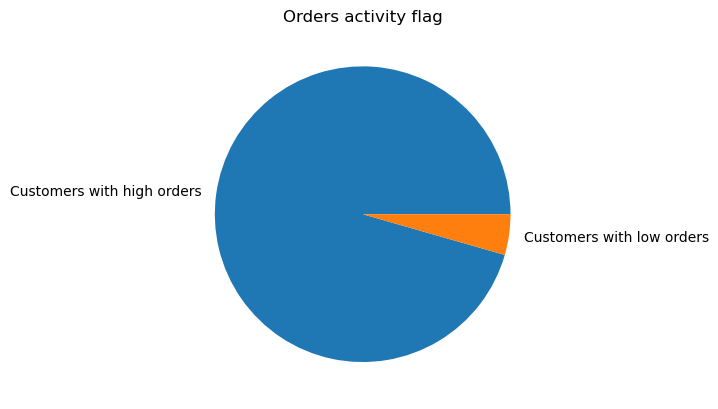

In [6]:
pie_2 = df['order_activity_flag'].value_counts().plot.pie(title = 'Orders activity flag', label = '')

In [7]:
# exporting the pie chart
pie_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_activity_flag.png'))

In [8]:
#Creating a subset for Customers with high orders
df_High_orders= df[df['order_activity_flag'] == 'Customers with high orders']

In [9]:
#Exporting the 'Customers with high orders'
df_High_orders.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_order_customers.pkl'))

# Step 5- Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

## Age

In [10]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_timing_in_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', ' price_range_loc', 'price_range_loc',
       'busiest_day', 'Busiest_days', 'Busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag',
       'median_days_prior_order', 'frequency_flag', 'Gender', 'State', 'Age',
       'date_joined', 'No of dependants', 'fam_status', 'income', 'Region',
       'order_activity_flag'],
      dtype='object')

In [11]:
# Creating a 'age flag' using loc function
df.loc[df['Age']>65,'age_flag']='Senior adult'
df.loc[(df['Age']<=65) & (df['Age']>40),'age_flag']='Middle-aged adult'
df.loc[df['Age']<=40,'age_flag']='Young adult'

In [12]:
df['age_flag'].value_counts(dropna=False)

Middle-aged adult    12646712
Young adult          11670046
Senior adult          8088101
Name: age_flag, dtype: int64

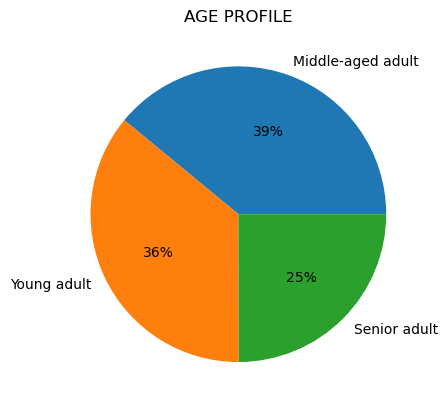

In [13]:
# Creating pie chart for age variable
age_profile=df['age_flag'].value_counts().plot.pie(title='AGE PROFILE',label='',autopct=('%1.f%%'))

In [14]:
# exporting the pie chart
age_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_profile.png'))

In [15]:
pd.options.display.max_columns=None

In [16]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_timing_in_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,price_range_loc,busiest_day,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_prior_order,frequency_flag,Gender,State,Age,date_joined,No of dependants,fam_status,income,Region,order_activity_flag,age_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4,0,both,High-range product,NaN,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range product,NaN,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult


In [17]:
df['age_flag'].value_counts(dropna=False).sum()

32404859

# Income

In [18]:
#Checking for descriptive statistics
df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

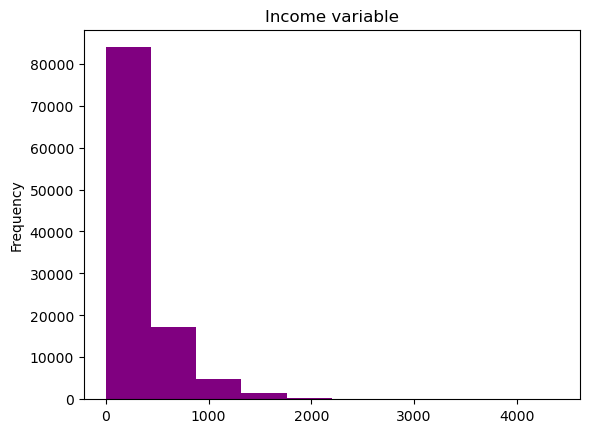

In [19]:
#To understand the income pattern using histogram
hist1= df['income'].value_counts().sort_index().plot.hist(bins= 10 , title = 'Income variable' ,color= 'purple')

In [20]:
# exporting the Histogram
hist1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Income variable.png'))

In [21]:
#Creating a 'income_flag' using the loc function
df.loc[df['income'] < 30000, 'income_flag'] = 'Low-income'
df.loc[(df['income'] >= 30000) & (df['income'] < 80000), 'income_flag']= 'Moderate-income'
df.loc[df['income'] >= 80000, 'income_flag'] = 'High-income'

In [22]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_timing_in_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,price_range_loc,busiest_day,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_prior_order,frequency_flag,Gender,State,Age,date_joined,No of dependants,fam_status,income,Region,order_activity_flag,age_flag,income_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4,0,both,High-range product,NaN,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range product,NaN,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income


In [23]:
df['income_flag'].value_counts(dropna=False)

High-income        20831060
Moderate-income    11366712
Low-income           207087
Name: income_flag, dtype: int64

In [24]:
df['income_flag'].value_counts(dropna=False).sum()

32404859

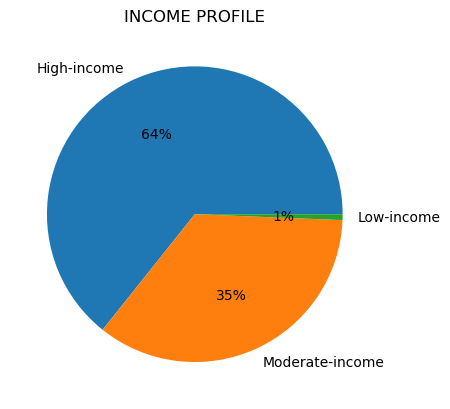

In [25]:
#create pie chart
income_profile=df['income_flag'].value_counts().plot.pie(title='INCOME PROFILE',label='', autopct=('%1.f%%'))

In [26]:
# exporting the pie chart
income_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income profile.png'))

# No of Dependents

In [27]:
df.rename(columns={'No of dependants': 'No_of_dependants'}, inplace = True)

In [28]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_timing_in_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,price_range_loc,busiest_day,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_prior_order,frequency_flag,Gender,State,Age,date_joined,No_of_dependants,fam_status,income,Region,order_activity_flag,age_flag,income_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4,0,both,High-range product,NaN,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,both,High-range product,NaN,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income


Creating a "Marital status flag"

Family = >0

Single == 0

In [29]:
#Creating a "Marital status flag" using Loc function
df.loc[df['No_of_dependants'] == 0,'Marital_status_flag']='Single'
df.loc[df['No_of_dependants'] >0,'Marital_status_flag']='Family'

In [30]:
df['Marital_status_flag'].value_counts(dropna=False)

Family    24307356
Single     8097503
Name: Marital_status_flag, dtype: int64

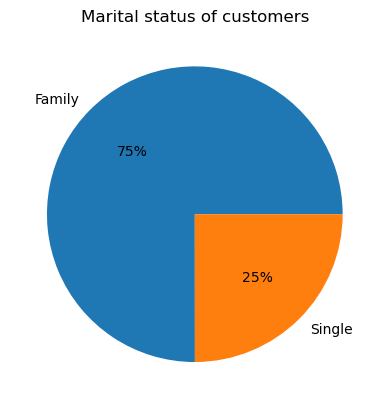

In [31]:
# creating a pie chart
family_profile=df['Marital_status_flag'].value_counts().plot.pie(title='Marital status of customers',label='',autopct=('%1.f%%'))

Customers with family gives the highest sales revenue for instacart.

In [32]:
# exporting the viz
family_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Marital status of customers.png'))

# department_id

In [33]:
#import department dataframe
df_dep=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_dep_t_new.csv'))

In [34]:
df_dep.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [35]:
#Renaming the unnamed to department_id
df_dep.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [36]:
#Checking the change
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [37]:
# merging the df with df_dep
df_merged = df.merge(df_dep, on = 'department_id')

In [38]:
df_merged

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_timing_in_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,price_range_loc,busiest_day,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_prior_order,frequency_flag,Gender,State,Age,date_joined,No_of_dependants,fam_status,income,Region,order_activity_flag,age_flag,income_flag,Marital_status_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income,Family,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income,Family,snacks
2,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,24.0,3,0,both,NaN,Low-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income,Family,snacks
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,7.0,2,0,both,NaN,Low-range product,Busiest day,Busiest days,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income,Family,snacks
4,13424,Almonds,45,19,4.2,3139998,138,28,6,11,3.0,4,0,both,NaN,Low-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income,Family,snacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,25524,Infant Formula With Iron,92,18,4.4,1137249,154028,1,1,16,NaN,1,0,both,NaN,Low-range product,Regularly busy,Busiest days,Most orders,4,New customer,13.9,High spender,30.0,Non frequent customer,Female,Delaware,62,8/25/2018,0,divorced/widowed,49144,South,Customers with low orders,Middle-aged adult,Moderate-income,Single,babies
32404855,49215,Kids Sensible Foods Broccoli Littles,92,18,2.0,757647,6228,1,6,15,NaN,3,0,both,NaN,Low-range product,Regularly busy,Regularly busy,Most orders,4,New customer,14.7,High spender,30.0,Non frequent customer,Female,Colorado,46,3/14/2017,2,married,46523,West,Customers with low orders,Middle-aged adult,Moderate-income,Family,babies
32404856,28337,Swaddlers Diapers Giant Pack - Size 3,56,18,11.8,3219892,126356,1,3,19,NaN,1,0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,3,New customer,11.8,High spender,30.0,Non frequent customer,Male,North Dakota,22,12/13/2017,0,single,68385,Midwest,Customers with low orders,Young adult,Moderate-income,Single,babies
32404857,37289,Morning Mish Mash Blueberry Oats & Quinoa Snack,92,18,11.2,361832,126356,2,0,18,30.0,1,0,both,NaN,Mid-range product,Busiest day,Busiest days,Average orders,3,New customer,11.8,High spender,30.0,Non frequent customer,Male,North Dakota,22,12/13/2017,0,single,68385,Midwest,Customers with low orders,Young adult,Moderate-income,Single,babies


In [39]:
# to show the products from "missing" department 
df_merged.loc[df_merged['department_id']==21, 'product_name'].unique()

array(['Cheesecake Salted Caramel Cups',
       'Chocolate Fudge Greek Yogurt Bar',
       'Go Big Strawberry/Mixed Berry Low Fat Yogurt', ...,
       'Grill Mates Brown Sugar Bourbon Seasoning',
       'Regular Sliced Bacon', 'Salt & Vinegar Flavored Potato Crisps'],
      dtype=object)

Create categorization based on the purchased products:
- Daily essentials: 1 (frozen), 2 (other), 3 (bakery), 4 (produce), 8(pets), 9 (dry goods pasta), 10 (bulk), 12 (meat seafood), 13 (pantry), 14 (breakfast), 15 (canned goods), 16 (dairy eggs), 17 (household), 18(babies), 19 (snacks), 21 (missing)
- Drinks: 7 (beverages),  5 (alcohol)
- Personal care: 11 (personal care)
- Food lovers: 6 (international), 20 (deli)

In [40]:
# create a new dataframe to calculate the frequency of purchases from each department for each customer
df_dept_merged = df_merged.groupby(['user_id', 'department_id', 'department']).size().reset_index(name = 'product_count')

In [41]:
df_dept_merged

,user_id,department_id,department,product_count
0,1,4,produce,5
1,1,7,beverages,13
2,1,13,pantry,1
3,1,14,breakfast,3
4,1,16,dairy eggs,13
...,...,...,...,...
2232135,206209,15,canned goods,7
2232136,206209,16,dairy eggs,28
2232137,206209,17,household,14
2232138,206209,19,snacks,11


In [42]:
#Creating the categorization
Daily_essentials = [1,2,3,4,8,9,10,12,13,14,15,16,17,18,19,21]
Drinks = [5,7]
Personal_care = [11]
Food_lovers = [6,20]

In [43]:
#Creating the groups based on the categories created above
df_merged.loc[df_merged['department_id'].isin(Daily_essentials), 'category'] = 'Daily essentials'
df_merged.loc[df_merged['department_id'].isin(Drinks), 'category'] = 'Drinks'
df_merged.loc[df_merged['department_id'].isin(Personal_care), 'category'] = 'Personal care'
df_merged.loc[df_merged['department_id'].isin(Food_lovers), 'category'] = 'Food lovers'


In [44]:
#Checking the frequency of the variable created
df_merged['category'].value_counts(dropna= False)

Daily essentials    27794966
Drinks               2841819
Food lovers          1320502
Personal care         447572
Name: category, dtype: int64

In [45]:
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_timing_in_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,price_range_loc,busiest_day,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_prior_order,frequency_flag,Gender,State,Age,date_joined,No_of_dependants,fam_status,income,Region,order_activity_flag,age_flag,income_flag,Marital_status_flag,department,category
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income,Family,snacks,Daily essentials
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income,Family,snacks,Daily essentials
2,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,24.0,3,0,both,NaN,Low-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income,Family,snacks,Daily essentials
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,7.0,2,0,both,NaN,Low-range product,Busiest day,Busiest days,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income,Family,snacks,Daily essentials
4,13424,Almonds,45,19,4.2,3139998,138,28,6,11,3.0,4,0,both,NaN,Low-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,20.0,High spender,30.0,Non frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Customers with high orders,Senior adult,Moderate-income,Family,snacks,Daily essentials


Text(0, 0.5, 'Sales in USD')

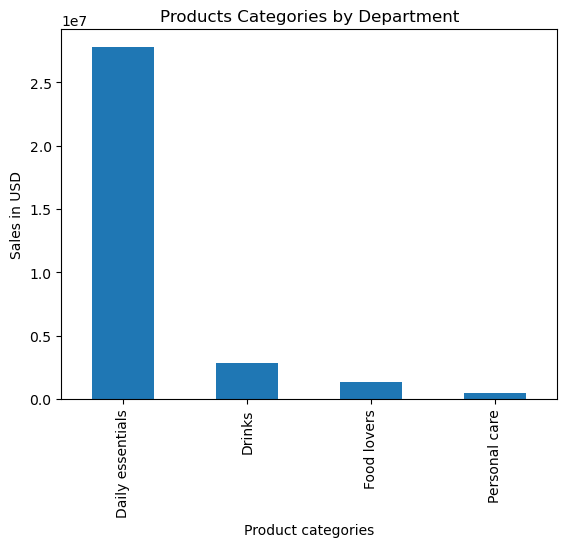

In [46]:
# create bar chart
dept_bar = df_merged['category'].value_counts().plot.bar(title = 'Products Categories by Department')
plt.xlabel('Product categories')
plt.ylabel('Sales in USD')

From classifying the products in different categories its clear that the day to day essentials contributes the high revenue of Instacart.

In [47]:
# exporting the viz
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Products Categories by department.png'))

Text(0, 0.5, 'Average prices in USD')

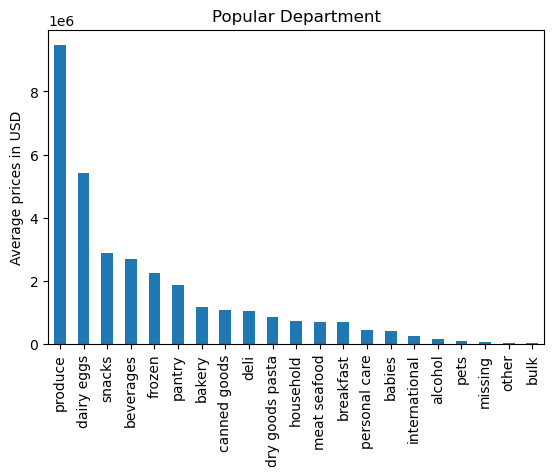

In [48]:
# create bar chart
Popular_department = df_merged['department'].value_counts().plot.bar(title = 'Popular Department')
plt.subplots_adjust(top=0.925, 
                    bottom=0.27) 
plt.ylabel('Average prices in USD')

In [49]:
# exporting the viz
Popular_department.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Popular department.png'))

In [50]:
# create a crosstab between the "Region" column and "age_flag" column
crosstab_loyalty_department = pd.crosstab(df_merged['department'], df_merged['loyalty_flag'], normalize ='index', dropna = False)

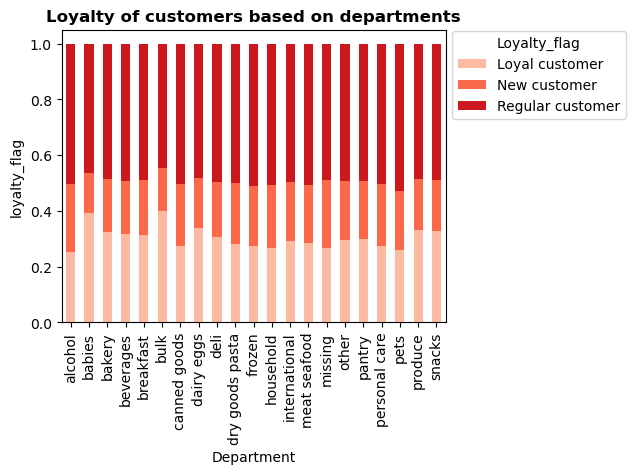

In [51]:
# creating a bar chart between loyalty flag and department
loyal = crosstab_loyalty_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('Reds',3))

# customize the plot
plt.xlabel('Department')
plt.ylabel('loyalty_flag')
plt.title('Loyalty of customers based on departments', fontweight='bold')
plt.legend(title ='Loyalty_flag', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.subplots_adjust(bottom = 0.27, left= 0.3)

# Show the plot
plt.show()

In [52]:
# exporting the viz
loyal.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Loyalty based on department.png'))

# Step 6 : Create an appropriate visualization to show the distribution of profiles.


 All the visualizations are made above and exported to the Analysis folders 

# Step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### AGE

In [53]:
# age_profile statistics
df_merged.groupby('age_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices               
                                     max       mean  min    max      mean  min
age_flag                                                                      
Middle-aged adult                   30.0  11.113621  0.0   25.0  7.792152  1.0
Senior adult                        30.0  11.080922  0.0   25.0  7.793480  1.0
Young adult                         30.0  11.109790  0.0   25.0  7.785757  1.0

The frequency and expenditure are similar across age groups, but middle-aged shoppers tend to shop a little more frequently while senior adults tend to purchase slightly more expensive products.    

### INCOME

In [54]:
# income_profile statistics
df_merged.groupby('income_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices               
                                   max       mean  min    max      mean  min
income_flag                                                                 
High-income                       30.0  11.045033  0.0   25.0  7.959475  1.0
Low-income                        30.0  11.970702  0.0   25.0  6.524778  1.0
Moderate-income                   30.0  11.197050  0.0   25.0  7.502979  1.0

From the data, its clear that the people with low income tend to order little cheaper products but the order frequency among low income people are slightly higher when compared to the other two categories.

### NO OF DEPENDENTS

In [55]:
# marital_status statistics
df_merged.groupby('Marital_status_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices            \
                                       max       mean  min    max      mean   
Marital_status_flag                                                           
Family                                30.0  11.111834  0.0   25.0  7.790498   
Single                                30.0  11.080805  0.0   25.0  7.789227   

                          
                     min  
Marital_status_flag       
Family               1.0  
Single               1.0

From the above data, Its clear that those who live in families order little frequently than who live alone.

### DEPARTMENT ID

In [56]:
# Product Category statistics
df_merged.groupby('category').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices               
                                    max       mean  min    max      mean  min
category                                                                     
Daily essentials                   30.0  11.094392  0.0   25.0  7.796986  1.0
Drinks                             30.0  11.015648  0.0   15.0  7.705554  1.0
Food lovers                        30.0  11.334597  0.0   15.0  7.759037  1.0
Personal care                      30.0  11.593145  0.0   15.0  7.996769  1.0

From the above data, suprisingly the product category 'Personal care' has the highest frequency of reorders and has the highest price revenue when compared to other categories, this may be due to people now days are more keen in self care. Whereas, the food orders are ordered more frequently but the pricing is less compared to all other categories. 

# Step 8&9 : Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important. And Produce suitable charts.

## Age

### Age profile by Regions

In [57]:
# create a crosstab between the "Region" column and "age_flag" column
crosstab_region_age = pd.crosstab(df_merged['Region'], df_merged['age_flag'], normalize ='index', dropna = False)

In [58]:
crosstab_region_age

age_flag,Middle-aged adult,Senior adult,Young adult
Region,,,
Midwest,0.395035,0.247671,0.357294
Northeast,0.387566,0.254940,0.357495
South,0.386626,0.247354,0.366020
West,0.392521,0.250586,0.356892


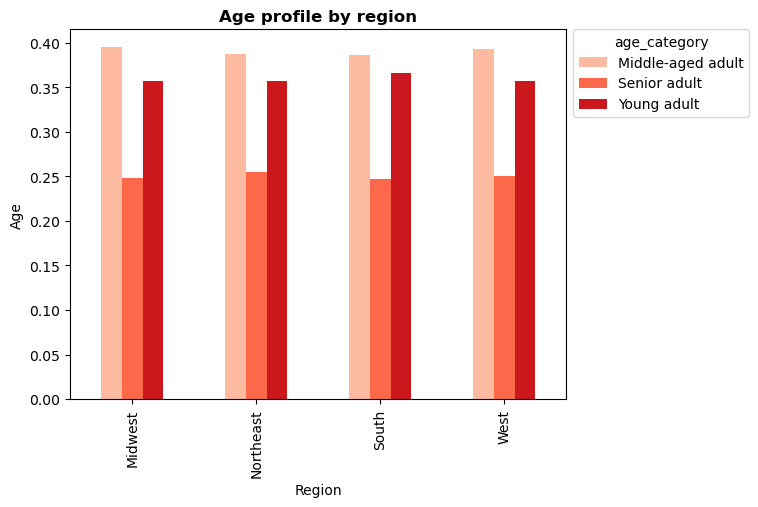

In [59]:
# creating a bar chart between age and region
regions_age=crosstab_region_age.plot.bar(color=sns.color_palette('Reds',3))
plt.title('Age profile by region',fontweight='bold')
plt.ylabel('Age')
plt.legend(title ='age_category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

The most of the customers of Instacart belong to Middle aged group in all the four region, followed by it is the young adults.

In [60]:
# exporting the viz
regions_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Age profile by region.png'))

### Age profile by Department

In [61]:
# create a crosstab between the "department" column and "age_flag" column
crosstab_department_age = pd.crosstab(df_merged['department'], df_merged['age_flag'], normalize ='columns', dropna = False)

In [62]:
crosstab_department_age

age_flag,Middle-aged adult,Senior adult,Young adult
department,,,
alcohol,0.004705,0.004568,0.004905
babies,0.013269,0.012763,0.013090
bakery,0.036354,0.036006,0.036113
beverages,0.083468,0.083489,0.082027
breakfast,0.021797,0.021460,0.021748
bulk,0.001064,0.001064,0.001072
canned goods,0.032879,0.032890,0.033095
dairy eggs,0.166078,0.166391,0.167319
deli,0.032484,0.032411,0.032416


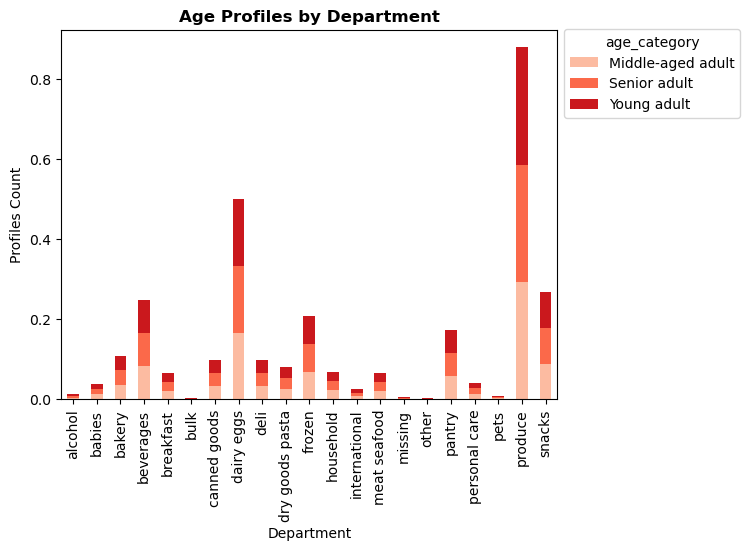

In [63]:
# creating a bar chart between age and department
department_age = crosstab_department_age.plot(kind = 'bar', stacked = True, color = sns.color_palette('Reds',3))

# customize the plot
plt.xlabel('Department')
plt.ylabel('Profiles Count')
plt.title('Age Profiles by Department', fontweight='bold')
plt.legend(title ='age_category', bbox_to_anchor=(1, 1.02), loc='upper left')

# Show the plot
plt.show()

The top 5 departments based on profile counts are produce,dairy eggs, snacks, beverages and frozen.

# Income

## Income by region

In [64]:
# create a crosstab between the "Region" column and "income_flag" column
crosstab_region_income = pd.crosstab(df_merged['Region'], df_merged['income_flag'], dropna = False)

In [65]:
crosstab_region_income

income_flag,High-income,Low-income,Moderate-income
Region,,,
Midwest,4913290,56416,2627619
Northeast,3715342,35352,1972042
South,6894844,69527,3827514
West,5307584,45792,2939537


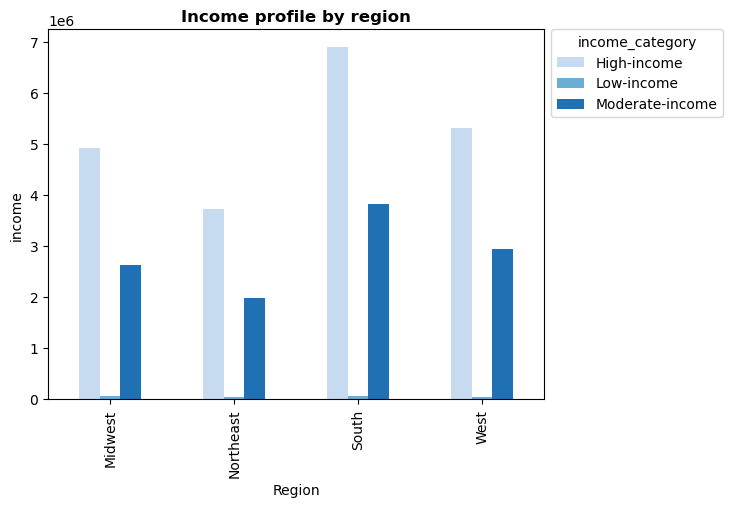

In [66]:
# create the visualization of Income Profiles by Region
regions_income =crosstab_region_income.plot.bar(color=sns.color_palette('Blues',3))
plt.title('Income profile by region',fontweight='bold')
plt.legend(title ='income_category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('income')
plt.show()

Across all the regions, the high income people made the largest proportion.

In [67]:
# exporting the viz
regions_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_income.png'))

## Income by the department

In [68]:
# create a crosstab between the "department" column and "income_flag" column
crosstab_department_income = pd.crosstab(df_merged['department'], df_merged['income_flag'], dropna = False)

In [69]:
crosstab_department_income

income_flag,High-income,Low-income,Moderate-income
department,,,
alcohol,99787,1394,52515
babies,287317,1669,134816
bakery,770599,6460,395369
beverages,1642715,24691,1020717
breakfast,434105,5167,263761
bulk,20983,341,13249
canned goods,714940,4682,348436
dairy eggs,3528170,30256,1840321
deli,677903,6925,366421


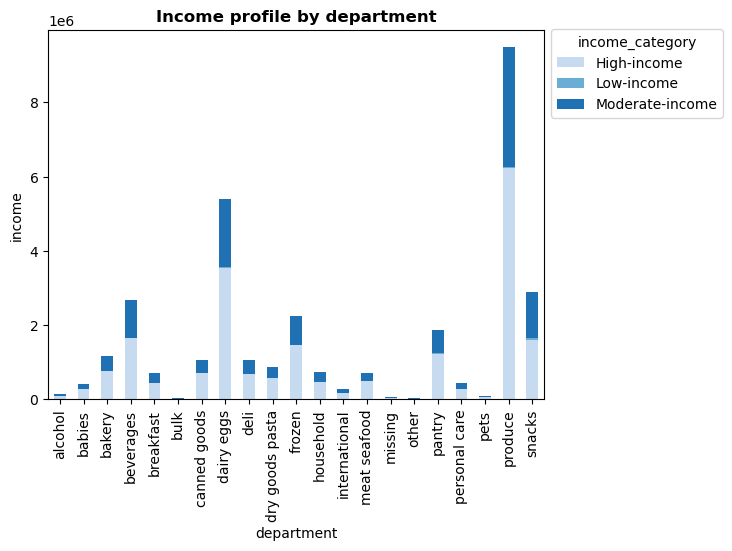

In [70]:
# creating stacked bar chart
dept_income = crosstab_department_income.plot.bar(stacked=True,color=sns.color_palette('Blues',3))
plt.title('Income profile by department',fontweight='bold')
plt.legend(title ='income_category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('income')
plt.show()    

Produce, dairy eggs, and snacks are the top three departments across all income profiles and the least three departments are pets,missing and others.

In [71]:
# exporting the viz
dept_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_income.png'))

# NO OF DEPENDENTS

## No of dependents by region

In [72]:
# create a crosstab between the "region" column and " Marital status_flag" column
crosstab_region_family = pd.crosstab(df_merged['Region'], df_merged['Marital_status_flag'], dropna = False)

In [73]:
crosstab_region_family

Marital_status_flag,Family,Single
Region,,
Midwest,5692125,1905200
Northeast,4304435,1418301
South,8090226,2701659
West,6220570,2072343


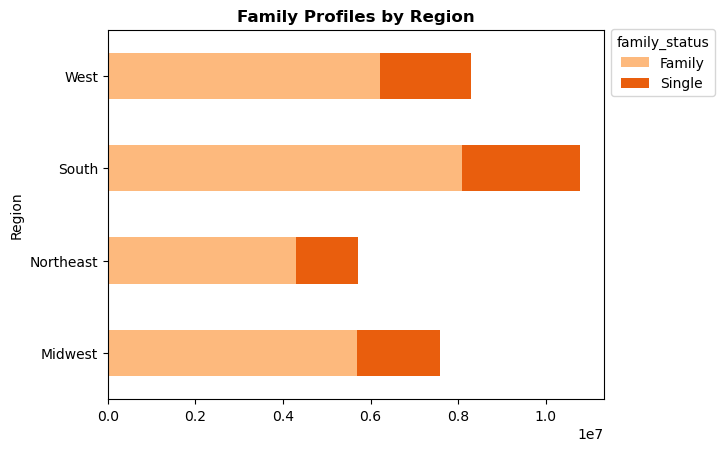

In [74]:
# creating the visualization for Family Profiles by Region
region_family = crosstab_region_family.plot(kind = 'barh', stacked = True, color = sns.color_palette('Oranges', 2))
plt.title('Family Profiles by Region', fontweight='bold')
plt.legend(title = 'family_status', bbox_to_anchor=(1, 1.02), loc='upper left')

The proportion of family and single lives more in south region, and Northeast region with the lowest proportion.

In [75]:
# export the viz
region_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_family.png'))

## NO OF DEPENDENTS BY DEPARTMENTS

In [76]:
# create a crosstab between the "department" column and "status_flag" column
crosstab_department_family = pd.crosstab(df_merged['department'], df_merged['Marital_status_flag'], dropna = False)

In [77]:
crosstab_department_family

Marital_status_flag,Family,Single
department,,
alcohol,114578,39118
babies,317308,106494
bakery,878023,294405
beverages,2013681,674442
breakfast,528456,174577
bulk,26295,8278
canned goods,803220,264838
dairy eggs,4049385,1349362
deli,786104,265145


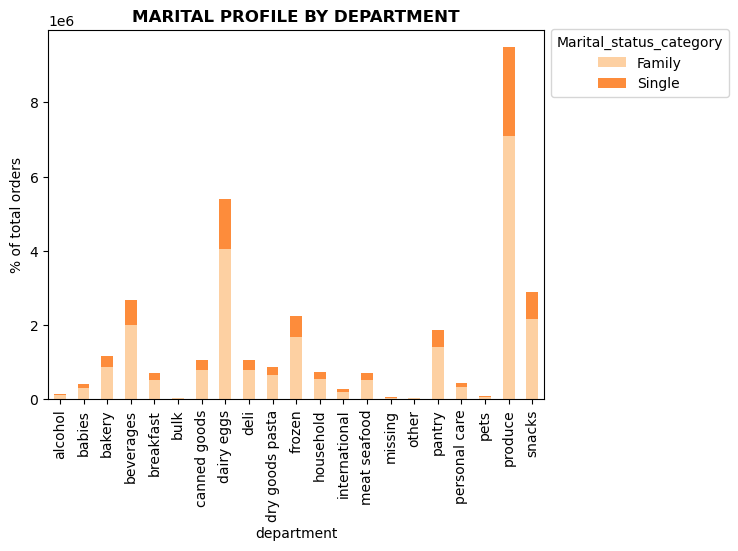

In [78]:
# creating stacked bar chart
dept_family = crosstab_department_family.plot.bar(stacked=True,color=sns.color_palette('Oranges',3))
plt.title('MARITAL PROFILE BY DEPARTMENT',fontweight='bold')
plt.legend(title ='Marital_status_category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('% of total orders')
plt.show()    

In [79]:
# exporting the viz
dept_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_family.png'))

# DEPARTMENT

## Department by region

In [80]:
#create a crosstab between the "region" column and "category" column
crosstab_region_department = pd.crosstab(df_merged['department'], df_merged['Region'], normalize = 'index', dropna = False)

In [81]:
crosstab_region_department

Region,Midwest,Northeast,South,West
department,,,,
alcohol,0.235439,0.172692,0.335884,0.255986
babies,0.233560,0.177297,0.338965,0.250178
bakery,0.233591,0.177921,0.331632,0.256856
beverages,0.232718,0.179835,0.334412,0.253036
breakfast,0.232636,0.175773,0.333201,0.258390
bulk,0.236977,0.167819,0.333584,0.261620
canned goods,0.234727,0.174855,0.333329,0.257089
dairy eggs,0.234170,0.176712,0.332849,0.256269
deli,0.233701,0.177710,0.332385,0.256205


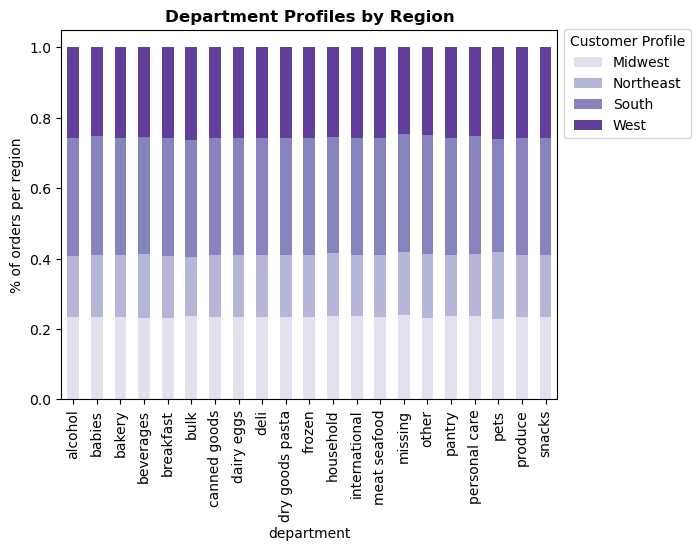

In [82]:
# create the visualization of Department Profiles by Region
region_department = crosstab_region_department.plot.bar(stacked = True, color = sns.color_palette('Purples', 4))

# customize the plot
plt.title('Department Profiles by Region', fontweight='bold')
plt.legend(title = 'Customer Profile', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('% of orders per region')

# show the plot
plt.show()

The ordering habits across all departments remain consistent for all the four regions.		
South region represents the highest number of orders.												

In [83]:
# export the viz
region_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department.png'))

In [84]:
#Checking for final info
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 39 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   product_id               int64   
 1   product_name             object  
 2   aisle_id                 int64   
 3   department_id            int64   
 4   prices                   float64 
 5   order_id                 int64   
 6   user_id                  int64   
 7   order_number             int64   
 8   orders_day_of_week       int64   
 9   orders_timing_in_day     int64   
 10  days_since_prior_order   float64 
 11  add_to_cart_order        int64   
 12  reordered                int64   
 13  _merge                   category
 14   price_range_loc         object  
 15  price_range_loc          object  
 16  busiest_day              object  
 17  Busiest_days             object  
 18  Busiest_period_of_day    object  
 19  max_order                int64   
 20  loyalty_flag          

In [85]:
#Exporting the final data in pickle format
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','Final Data Merged.pkl'))